In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import k_means,KMeans
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\spotify_csv.csv")
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [5]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [6]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

# Feature engineering

In [7]:
label_encoder = preprocessing.LabelEncoder()
  
df['track_id']= label_encoder.fit_transform(df['track_id'])
  
df['track_id'].unique()

array([24150,  3061,  7219, ..., 26465, 10083,  7864])

In [8]:
label_encoder = preprocessing.LabelEncoder()
  
df['track_name']= label_encoder.fit_transform(df['track_name'])
  
df['track_name'].unique()

array([ 8898, 12520,   924, ..., 18844, 14439, 20779])

In [9]:
label_encoder = preprocessing.LabelEncoder()
  
df['track_artist']= label_encoder.fit_transform(df['track_artist'])
  
df['track_artist'].unique()

array([ 2782,  6084, 10416, ...,  3165,  9102,  6140])

In [10]:
label_encoder = preprocessing.LabelEncoder()
  
df['track_album_id']= label_encoder.fit_transform(df['track_album_id'])
  
df['track_album_id'].unique()

array([ 8225, 17650,  3798, ...,  2263,  4914,  1558])

In [11]:
label_encoder = preprocessing.LabelEncoder()
  
df['track_album_name']= label_encoder.fit_transform(df['track_album_name'])
  
df['track_album_name'].unique()

array([ 7614, 10410,   985, ..., 15576, 11962, 17683])

In [12]:
label_encoder = preprocessing.LabelEncoder()
  
df['track_album_release_date']= label_encoder.fit_transform(df['track_album_release_date'])
  
df['track_album_release_date'].unique()

array([4315, 4492, 4335, ..., 2383, 2525, 2823])

In [13]:
label_encoder = preprocessing.LabelEncoder()
  
df['playlist_id']= label_encoder.fit_transform(df['playlist_id'])
  
df['playlist_id'].unique()

array([235, 190, 207, 146, 224, 212, 230, 218,   9, 319, 428, 128, 339,
       159, 456, 240, 152, 265, 315, 440, 295,  56, 459,  90,  73,  93,
       431, 402, 400, 419, 327, 131,  61, 101, 294, 435, 399, 273, 108,
       321, 118, 460, 299, 114, 147, 326, 367, 166, 293, 250, 117, 464,
        95, 260, 132, 341, 390, 143,  37,  83, 393, 312, 424, 462, 406,
       382,  57,  87, 323, 412, 405, 380, 298, 452, 328,  62, 111, 376,
       442,  92, 197, 196, 233, 205, 172, 181, 176, 158, 149, 215, 199,
       167, 242, 153, 210, 226, 156, 211, 157, 164, 330,  91,  49, 110,
       384,  14,  18, 291,  59, 277, 271,  31,   0, 308, 353, 258, 392,
        68, 346, 337, 377,  35,  51, 122, 245,  88, 426, 385,  10,  48,
       357,  81,  74,  20, 386, 247,  11,  98, 334,  60, 178, 175, 241,
       180, 162,  23, 217, 179, 201, 184, 151, 195, 234, 461, 174, 370,
       425, 154, 145, 467, 225,  94,  21, 270, 301, 394,  34, 125, 451,
       404,  76, 417,  89,  41, 126, 249, 279, 371, 286, 274, 17

In [14]:
label_encoder = preprocessing.LabelEncoder()
  
df['playlist_genre']= label_encoder.fit_transform(df['playlist_genre'])
  
df['playlist_genre'].unique()

array([2, 4, 5, 1, 3, 0])

In [15]:
label_encoder = preprocessing.LabelEncoder()
  
df['playlist_subgenre']= label_encoder.fit_transform(df['playlist_subgenre'])
  
df['playlist_subgenre'].unique()

array([ 3, 17,  5, 10,  8, 20,  6, 21,  0,  2, 15,  7, 22, 12, 19, 11, 23,
        9, 14, 13,  4,  1, 16, 18])

In [30]:
df = df.drop('playlist_name',axis = 1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  int32  
 1   track_name                32833 non-null  int32  
 2   track_artist              32833 non-null  int32  
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  int32  
 5   track_album_name          32833 non-null  int32  
 6   track_album_release_date  32833 non-null  int32  
 7   playlist_id               32833 non-null  int32  
 8   playlist_genre            32833 non-null  int32  
 9   playlist_subgenre         32833 non-null  int32  
 10  danceability              32833 non-null  float64
 11  energy                    32833 non-null  float64
 12  key                       32833 non-null  int64  
 13  loudness                  32833 non-null  float64
 14  mode  

In [32]:
# Finding ouliers by function

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1

lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR

ouliers = (df < lower_tail) | (df > upper_tail)
ouliers_count = ouliers.sum()
print(ouliers_count)


track_id                       0
track_name                     0
track_artist                   0
track_popularity               0
track_album_id                 0
track_album_name               0
track_album_release_date       0
playlist_id                    0
playlist_genre                 0
playlist_subgenre              0
danceability                 291
energy                       277
key                            0
loudness                    1021
mode                           0
speechiness                 3176
acousticness                2205
instrumentalness            7030
liveness                    1843
valence                        0
tempo                        571
duration_ms                 1387
dtype: int64


In [33]:
# To replace outliers
def Finding_outliar1(df_new,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns =df.columns

Finding_outliar1(df,columns)

-14225.5
42682.5
-11614.5
34997.5
-5508.0
16068.0
-33.0
119.0
-11222.5
33661.5
-10027.5
29672.5
-1723.0
7853.0
-243.5
704.5
-3.5
8.5
-12.0
36.0
0.26599999999999985
1.058
0.19249999999999995
1.2285
-8.5
19.5
-13.459999999999999
0.6440000000000001
-1.5
2.5
-0.0955
0.2685
-0.34475
0.61485
-0.007245
0.012074999999999999
-0.14024999999999999
0.48095
-0.2119999999999999
1.2359999999999998
49.022999999999975
184.85500000000002
89170.0
352234.0


In [34]:
df_new = df[['track_popularity','danceability','energy']]
df_new

,track_popularity,danceability,energy
0,66,0.748,0.916
1,67,0.726,0.815
2,70,0.675,0.931
3,60,0.718,0.930
4,69,0.650,0.833
...,...,...,...
32828,42,0.428,0.922
32829,20,0.522,0.786
32830,14,0.529,0.821
32831,15,0.626,0.888


In [35]:
Std = StandardScaler()
Std_array = Std.fit_transform(df_new)
df_std = pd.DataFrame(Std_array,columns=df_new.columns)
df_std

,track_popularity,danceability,energy
0,0.941531,0.644689,1.209083
1,0.981557,0.491741,0.646027
2,1.101635,0.137181,1.292705
3,0.701374,0.436124,1.287130
4,1.061609,-0.036622,0.746374
...,...,...,...
32828,-0.019096,-1.580000,1.242531
32829,-0.899670,-0.926498,0.484358
32830,-1.139827,-0.877833,0.679476
32831,-1.099801,-0.203474,1.052988


2D clustering based on track_popularity and danceability


In [36]:
x = df_std[['track_popularity','danceability']]
x

,track_popularity,danceability
0,0.941531,0.644689
1,0.981557,0.491741
2,1.101635,0.137181
3,0.701374,0.436124
4,1.061609,-0.036622
...,...,...
32828,-0.019096,-1.580000
32829,-0.899670,-0.926498
32830,-1.139827,-0.877833
32831,-1.099801,-0.203474


<Axes: xlabel='track_popularity', ylabel='danceability'>

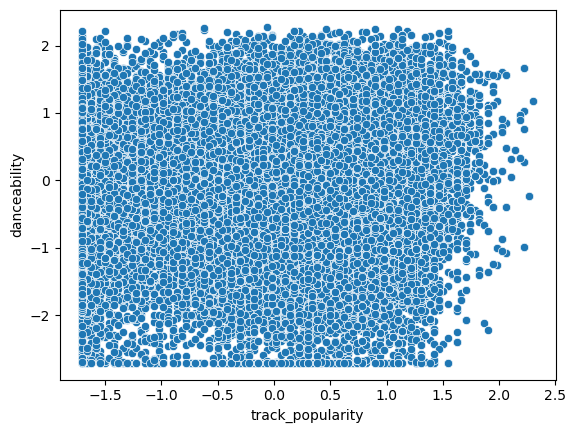

In [37]:

sns.scatterplot(x = df_std['track_popularity'],y = df_std['danceability'])

Using elbow method find best value of k

In [38]:
wcss_list=[]
k = np.arange(1,10)
for i in k:
    kmeans=KMeans(i)
    kmeans.fit(x)
    kmeans.predict(x)
    wcss = kmeans.inertia_
    wcss_list.append(wcss)
    

In [39]:
wcss_list

[65666.00000000006,
 41919.36467885582,
 26228.92822593543,
 20372.757273541913,
 16708.96591203217,
 13773.184271674645,
 11660.325586109702,
 10332.619281627429,
 9181.886524930524]

Text(0.5, 1.0, 'Elbow method')

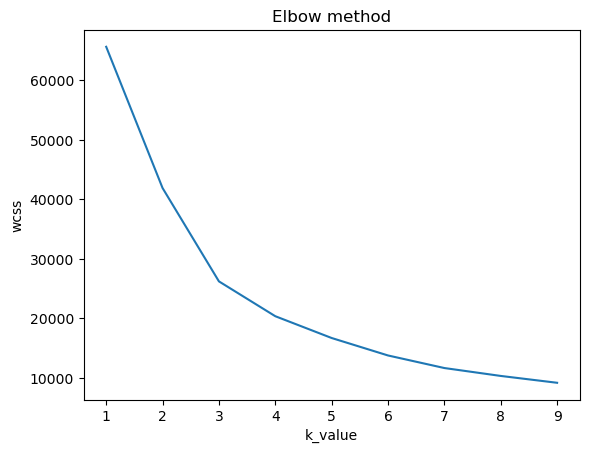

In [40]:
plt.plot(k ,wcss_list)
plt.xlabel('k_value')
plt.ylabel('wcss')
plt.title('Elbow method')

Applying kmeans for k = 4

In [41]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [42]:
kmeans.fit(x)


KMeans(n_clusters=4)

In [43]:
prediction = kmeans.predict(x)
y = pd.DataFrame(prediction)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
32828,3
32829,2
32830,2
32831,0


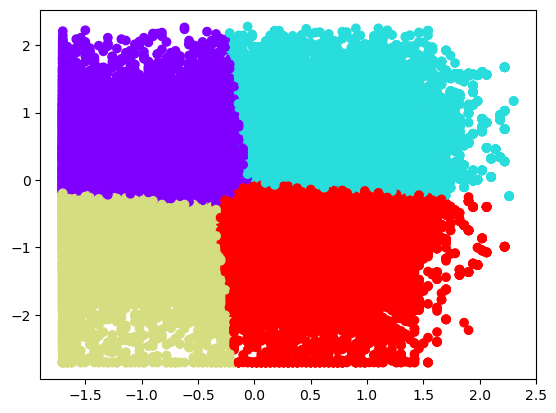

In [44]:
plt.scatter(x = df_std['track_popularity'],y = df_std['danceability'],c= prediction,cmap = 'rainbow')

2D clustering based on energy and loudness

In [48]:
x = df[['energy','loudness']]
x

,energy,loudness
0,0.916,-2.634
1,0.815,-4.969
2,0.931,-3.432
3,0.930,-3.778
4,0.833,-4.672
...,...,...
32828,0.922,-1.814
32829,0.786,-4.462
32830,0.821,-4.899
32831,0.888,-3.361


<Axes: xlabel='energy', ylabel='loudness'>

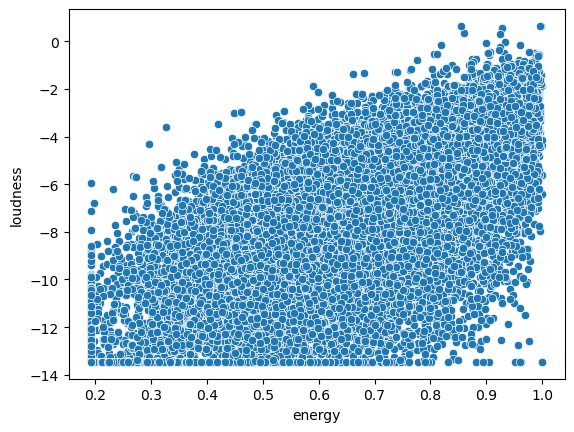

In [51]:

sns.scatterplot(x = df['energy'],y = df['loudness'])

Using elbow method find the best value of K

In [53]:
wcss_list=[]
k = np.arange(1,10)
for i in k:
    kmeans=KMeans(i)
    kmeans.fit(x)
    kmeans.predict(x)
    wcss = kmeans.inertia_
    wcss_list.append(wcss)
    

In [55]:
wcss_list

[247779.47349375303,
 81988.78305004127,
 39060.904769228386,
 23161.856935318436,
 15076.88919095239,
 10670.568087875257,
 8082.140946172465,
 6462.6159535243705,
 5170.990854298332]

Text(0.5, 1.0, 'Elbow method')

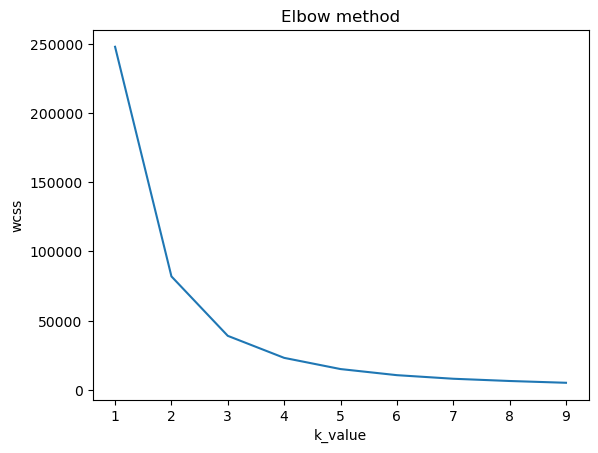

In [57]:
plt.plot(k ,wcss_list)
plt.xlabel('k_value')
plt.ylabel('wcss')
plt.title('Elbow method')


Applying kmeans for k = 3

In [65]:
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(n_clusters=3)

In [66]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [67]:
prediction = kmeans.predict(x)
y = pd.DataFrame(prediction)
y

,0
0,2
1,2
2,2
3,2
4,2
...,...
32828,2
32829,2
32830,2
32831,2


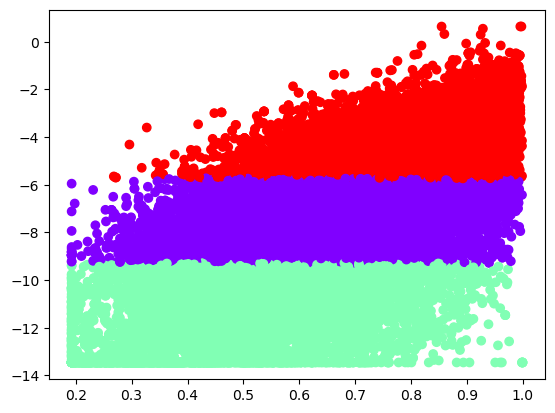

In [68]:
plt.scatter(x = df['energy'],y = df['loudness'],c= prediction,cmap = 'rainbow')

2D clustering based on track_artist and track_name

In [71]:
x = df[['track_artist','track_name']]
x

,track_artist,track_name
0,2782,8898
1,6084,12520
2,10416,924
3,9215,3020
4,5402,17910
...,...,...
32828,5725,3567
32829,9102,3642
32830,8746,18844
32831,6140,14439


<Axes: xlabel='track_artist', ylabel='track_name'>

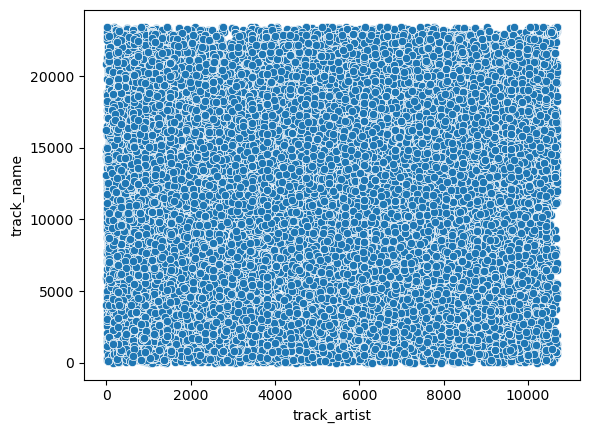

In [73]:

sns.scatterplot(x = df['track_artist'],y = df['track_name'])

Using elbow method to find the best value of k

In [75]:
wcss_list=[]
k = np.arange(1,10)
for i in k:
    kmeans=KMeans(i)
    kmeans.fit(x)
    kmeans.predict(x)
    wcss = kmeans.inertia_
    wcss_list.append(wcss)

In [77]:
wcss_list

[1808378442875.0647,
 686673353806.1646,
 483565261035.72766,
 389606306837.4736,
 308133741129.8638,
 244400781945.6033,
 201653865608.56775,
 171043626287.768,
 151889654588.17175]

Text(0.5, 1.0, 'Elbow method')

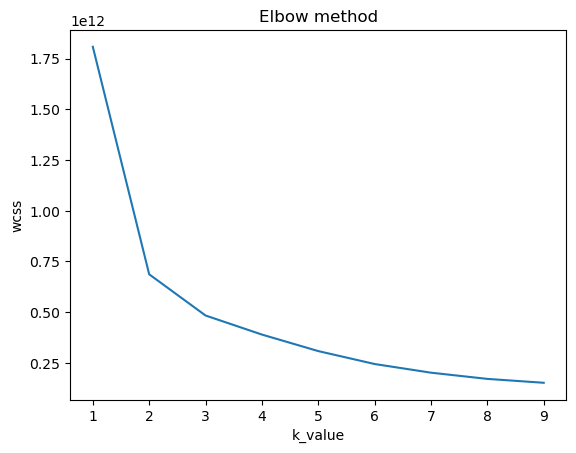

In [79]:
plt.plot(k ,wcss_list)
plt.xlabel('k_value')
plt.ylabel('wcss')
plt.title('Elbow method')


Applying kmeans for k = 2

In [81]:
kmeans = KMeans(n_clusters=2)
kmeans

KMeans(n_clusters=2)

In [83]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [85]:
prediction = kmeans.predict(x)
y = pd.DataFrame(prediction)
y

,0
0,0
1,1
2,0
3,0
4,1
...,...
32828,0
32829,0
32830,1
32831,1


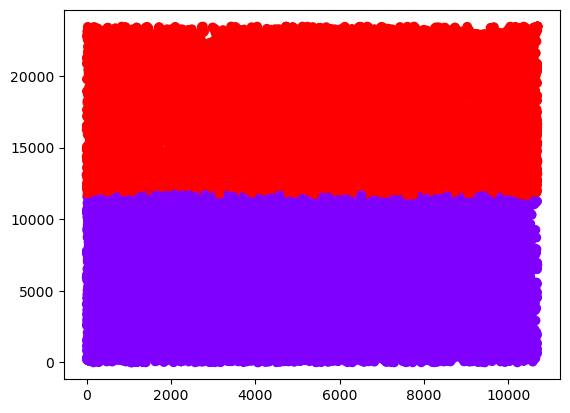

In [87]:
plt.scatter(x = df['track_artist'],y = df['track_name'],c= prediction,cmap = 'rainbow')

In [89]:
Data = df[['track_artist', 'track_name', 'track_popularity']]

# Choose the number of clusters
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(Data)

# Add cluster labels to your DataFrame
df['Cluster'] = kmeans.labels_

# View the resulting DataFrame
print(df)

       track_id  track_name  track_artist  track_popularity  track_album_id  \
0         24150        8898          2782                66            8225   
1          3061       12520          6084                67           17650   
2          7219         924         10416                70            3798   
3         25699        3020          9215                60            5293   
4          5987       17910          5402                69           21936   
...         ...         ...           ...               ...             ...   
32828     26856        3567          5725                42            7586   
32829     18774        3642          9102                20           19610   
32830     26465       18844          8746                14            2263   
32831     10083       14439          6140                15            4914   
32832      7864       20779          4707                27            1558   

       track_album_name  track_album_release_date  

In [91]:
print("Inertia:", kmeans.inertia_)

Inertia: 483607307782.3835


In [97]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(Data, kmeans.labels_)
print("Silhouette Score:",silhouette_avg)

Silhouette Score: 0.3909024242727261


In [99]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [102]:
import plotly.express as px

# Assuming Df_Std is your DataFrame with columns: 'track name', 'track artrist', 'track popularity'
df['Cluster'] = kmeans.labels_

# Create 3D scatter plot
fig = px.scatter_3d(df, x='track_artist', y='track_name', z='track_popularity', color='Cluster', symbol='Cluster')

# Update layout for better visibility and set width and height
fig.update_layout(
    scene=dict(
        xaxis=dict(nticks=4, range=[min(df['track_artist']), max(df['track_artist'])]),
        yaxis=dict(nticks=4, range=[min(df['track_name']), max(df['track_name'])]),
        zaxis=dict(nticks=4, range=[min(df['track_popularity']), max(df['track_popularity'])]),
    ),
    width=1200,  # Set the desired width
    height=1000  # Set the desired height
)

# Show the plot
fig.show()